In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
plt.style.use(style='seaborn')
%matplotlib inline

In [2]:
df=pd.read_csv('Hope_ENG_train.csv',usecols=['Text','Label'])


df = df[:1000][:1000]
df

,Text,Label
0,these tiktoks radiate gay chaotic energy and i...,Non_hope_speech
1,@Champions Again He got killed for using false...,Non_hope_speech
2,It's not that all lives don't matter,Non_hope_speech
3,Is it really that difficult to understand? Bla...,Non_hope_speech
4,Whenever we say black isn't that racists? Why...,Non_hope_speech
...,...,...
995,who is in the butt pick of the day?,Non_hope_speech
996,ALL LIVES MATTER a$$ hole,Non_hope_speech
997,She sounds so musical! Love the Legend! No one...,Non_hope_speech
998,#BlackLivesMatter isnt about being better than...,Non_hope_speech


In [3]:
df.isna().sum()

Text     0
Label    0
dtype: int64

In [4]:
df['Label'].value_counts()

Non_hope_speech    914
Hope_speech         86
Name: Label, dtype: int64

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [ ]:
from collections import defaultdict

In [ ]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)

In [ ]:
for text in df[df.Label=="Hope_speech"].Text:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

In [ ]:
for text in df[df.Label=="Non_hope_speech"].Text:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

In [ ]:
df_hope=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_non_hope=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))

In [ ]:
pd1=df_hope[0][:10]
pd2=df_hope[1][:10]

In [ ]:
ned1=df_non_hope[0][:10]
ned2=df_non_hope[1][:10]

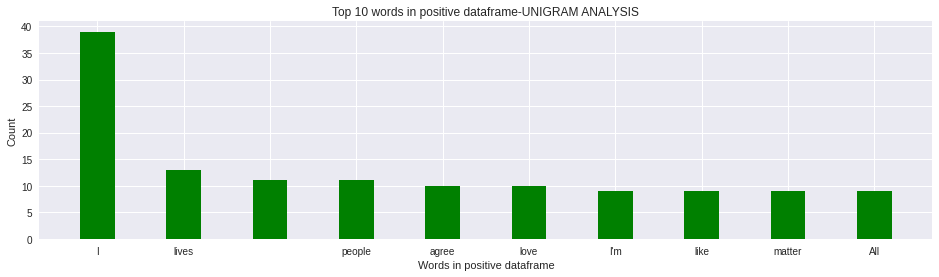

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green', width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

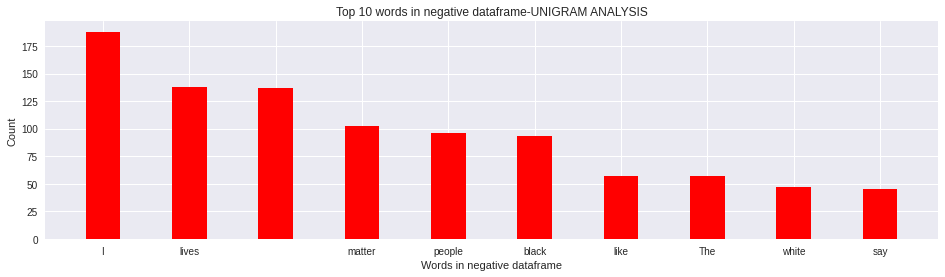

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red', width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

BIGRAMS

In [ ]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)

for text in df[df.Label=="Hope_speech"].Text:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

In [ ]:
for text in df[df.Label=="Non_hope_speech"].Text:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

In [ ]:
df_hope2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_non_hope2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))

In [ ]:
pd1=df_hope2[0][:10]
pd2=df_hope2[1][:10]

In [ ]:
ned1=df_non_hope2[0][:10]
ned2=df_non_hope2[1][:10]

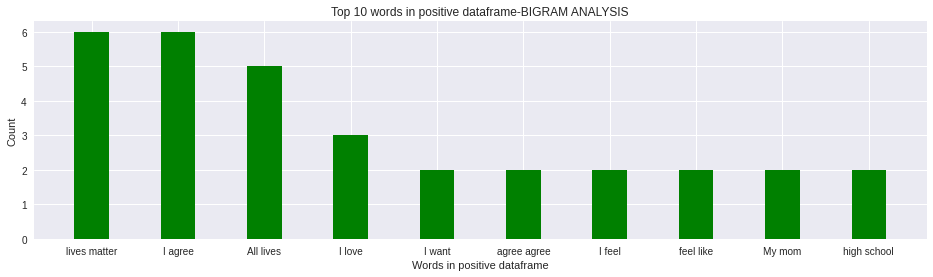

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")
plt.savefig("positive-bigram.png")
plt.show()

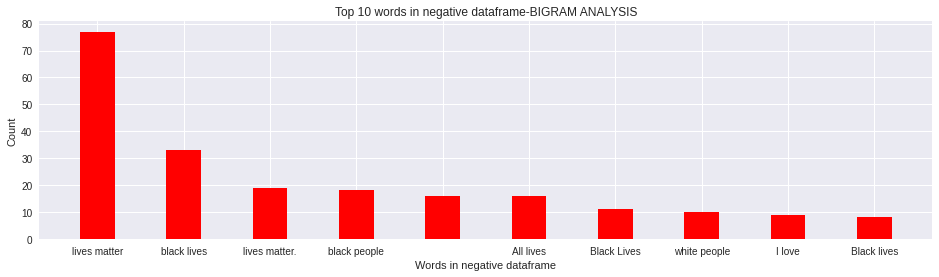

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red', width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

TRIGRAMS

In [ ]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)

In [ ]:
for text in df[df.Label=="Hope_speech"].Text:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

In [ ]:
for text in df[df.Label=="Non_hope_speech"].Text:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['tiktoks', 'radiate', 'gay', 'chaotic', 'energy', 'love']
Sentence after removing stopwords: ['@Champions', 'Again', 'He', 'got', 'killed', 'using', 'false', 'money']
Sentence after removing stopwords: ["It's", 'lives', 'matter']
Sentence after removing stopwords: ['Is', 'really', 'difficult', 'understand?', 'Black', 'lives', 'matter', 'lives', 'matter', 'mutually', 'exclusive.', 'They', 'true', 'general', 'statements.', 'So', 'white', 'lives', 'matter', 'asian', 'lives', 'matter.', 'Black', 'lives', 'matter', 'context', 'simply', 'name', 'movement', 'strangely', 'high', 'rate', 'police', 'violence', 'black', 'people', 'statement', 'referring', 'behave', 'like', 'treat', 'black', 'people', 'dont', 'matter.', 'For', 'example']
Sentence after removing stopwords: ['Whenever', 'say', 'black', 'racists?', '', 'Why', 'say', 'Americans.']
Sentence after removing stopwords: ['Ros', 'The', 'Boss', 'u', 'don’t', 'know', 'she’s', 'actually', 'lgbtq', 'tho', 'so

In [ ]:
df_hope3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_non_hope3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))

In [ ]:
pd1tri=df_hope3[0][:10]
pd2tri=df_hope3[1][:10]

In [ ]:
ned1tri=df_non_hope3[0][:10]
ned2tri=df_non_hope3[1][:10]

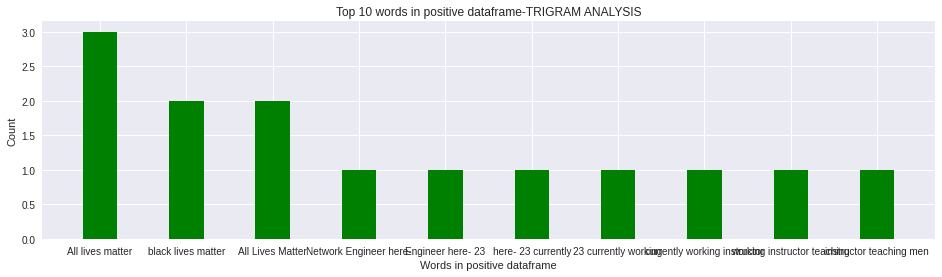

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")
plt.show()

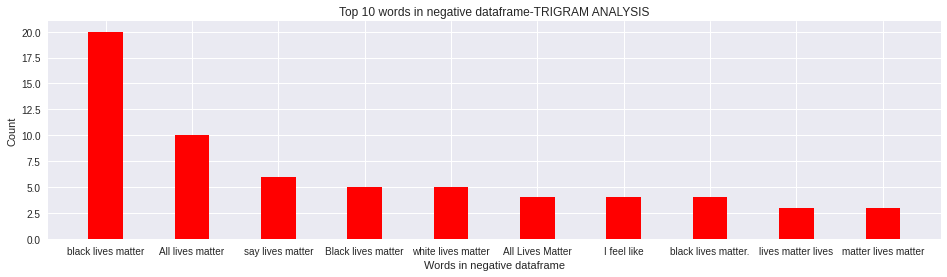

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red', width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

TF-IDF INDIVIDUAL

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

TF-IDF

FOR HOPE

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
string_hop_uni = []

for i in range(len(df_hope[0])):
  string_hop_uni.append(df_hope[0][i])

print(string_hop_uni)

['I', 'lives', '', 'people', 'agree', 'love', "I'm", 'like', 'matter', 'All', 'still', 'matter.', 'think', 'really', 'one', 'Christian', 'I’m', 'black', 'life', 'much', 'men', 'want', 'My', 'it.', 'And', 'feel', 'need', 'make', 'made', 'The', 'race', 'This', 'You', 'thinking', 'We', 'But', 'live', 'way', 'Thank', 'say', 'engineering', 'women', 'friends', 'never', 'Why', 'nothing', 'God', 'fit', 'school', 'She', 'things', 'many', 'boy', 'said', 'created', 'going', 'means', 'A', 'us', 'disagree', 'let', 'go', 'get', 'always', 'gave', "It's", "That's", 'age', 'choice', 'looking', 'gender', 'parents', 'know', 'thankful', 'find', 'forever', 'family', 'career', 'yourself.', 'matters', 'better', 'comes', 'wanting', 'video', 'human', 'glad', 'proud', 'friend', 'type', 'don’t', 'Only', 'mom', 'high', 'People', 'bad', 'must', 'Madonna', 'woman', 'Christianity', 'What', 'young', 'racism.', 'grew', 'different', 'humans', 'they’re', 'literally', '1', 'another', 'exactly', 'good.', 'killed', 'seems'

In [ ]:
# create object
tfidf = TfidfVectorizer()
# get tf-df values
result_hope_uni = tfidf.fit_transform(string_hop_uni)

In [ ]:
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names(), tfidf.idf_):
	print(ele1, ':', ele2)

In [ ]:
print('\nWord indexes:')
print(tfidf.vocabulary_)


Word indexes:
{'lives': 314, 'people': 398, 'agree': 20, 'love': 322, 'like': 308, 'matter': 340, 'all': 24, 'still': 483, 'think': 512, 'really': 430, 'one': 385, 'christian': 100, 'black': 68, 'life': 307, 'much': 361, 'men': 351, 'want': 552, 'my': 365, 'it': 280, 'and': 32, 'feel': 196, 'need': 367, 'make': 332, 'made': 327, 'the': 506, 'race': 422, 'this': 514, 'you': 584, 'thinking': 513, 'we': 557, 'but': 83, 'live': 313, 'way': 556, 'thank': 503, 'say': 445, 'engineering': 179, 'women': 570, 'friends': 210, 'never': 369, 'why': 566, 'nothing': 376, 'god': 229, 'fit': 203, 'school': 447, 'she': 459, 'things': 511, 'many': 336, 'boy': 75, 'said': 441, 'created': 131, 'going': 230, 'means': 348, 'us': 542, 'disagree': 155, 'let': 304, 'go': 228, 'get': 220, 'always': 28, 'gave': 215, 'that': 505, 'age': 19, 'choice': 96, 'looking': 317, 'gender': 216, 'parents': 393, 'know': 296, 'thankful': 504, 'find': 199, 'forever': 205, 'family': 195, 'career': 87, 'yourself': 588, 'matters'

In [ ]:
print('\ntf-idf value:')
print(result_hope_uni)

In [ ]:
print('\ntf-idf values in matrix form:')
print(result_hope_uni.toarray())

TF-IDF FOR NON_HOPE UNIGRAM

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
string_non_hope_uni = []

for i in range(len(df_hope[0])):
  string_non_hope_uni.append(df_non_hope[0][i])

print(string_non_hope_uni)

['I', 'lives', '', 'matter', 'people', 'black', 'like', 'The', 'white', 'say', 'know', 'All', 'Black', 'said', 'saying', 'one', 'matter.', 'think', 'would', 'get', 'love', 'really', 'They', 'go', 'racist', 'You', 'What', 'Why', 'She', 'If', "I'm", 'don’t', 'someone', 'BLM', 'agree', 'A', 'see', 'He', 'So', 'years', 'Lives', 'And', 'mean', 'Madonna', 'right', 'never', 'girl', 'still', 'man', 'dont', 'That', 'it.', 'time', 'want', 'life', 'going', 'No', 'back', 'protest', 'good', 'got', "It's", 'way', 'thing', 'This', 'world', 'It’s', 'also', 'make', 'police', 'u', 'actually', 'even', 'But', 'video', 'We', 'many', 'God', 'lot', 'us', 'come', "that's", 'ALL', 'believe', 'tell', 'THE', '-', 'killed', 'every', 'It', 'need', 'LIVES', 'person', 'Juan', 'lol', 'statue', 'it’s', 'ever', 'something', 'Not', 'Just', 'Matter', 'Do', 'I’m', 'Thank', 'respect', 'When', 'thought', 'nothing', 'god', 'take', 'better', 'hate', 'much', 'made', 'feel', 'point', 'getting', '.', 'understand', 'that.', 'read

In [ ]:
# create object
tfidf = TfidfVectorizer()
# get tf-df values
result_non_uni = tfidf.fit_transform(string_non_hope_uni)

In [ ]:
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names(), tfidf.idf_):
	print(ele1, ':', ele2)

In [ ]:
print('\nWord indexes:')
print(tfidf.vocabulary_)


Word indexes:
{'lives': 285, 'matter': 309, 'people': 365, 'black': 54, 'like': 278, 'the': 492, 'white': 561, 'say': 426, 'know': 266, 'all': 10, 'said': 424, 'saying': 427, 'one': 354, 'think': 500, 'would': 580, 'get': 178, 'love': 296, 'really': 406, 'they': 497, 'go': 185, 'racist': 398, 'you': 588, 'what': 556, 'why': 565, 'she': 442, 'if': 231, 'don': 129, 'someone': 459, 'blm': 57, 'agree': 9, 'see': 433, 'he': 207, 'so': 457, 'years': 585, 'and': 21, 'mean': 312, 'madonna': 303, 'right': 420, 'never': 338, 'girl': 181, 'still': 471, 'man': 306, 'dont': 131, 'that': 490, 'it': 245, 'time': 508, 'want': 543, 'life': 277, 'going': 188, 'no': 342, 'back': 37, 'protest': 386, 'good': 191, 'got': 192, 'way': 550, 'thing': 498, 'this': 502, 'world': 577, 'also': 15, 'make': 304, 'police': 372, 'actually': 5, 'even': 142, 'but': 66, 'video': 534, 'we': 551, 'many': 307, 'god': 186, 'lot': 295, 'us': 529, 'come': 87, 'believe': 45, 'tell': 487, 'killed': 260, 'every': 144, 'need': 337

In [ ]:
print('\ntf-idf value:')
print(result_non_uni)

In [ ]:
print('\ntf-idf values in matrix form:')
print(result_non_uni.toarray())

In [ ]:
# importing the csv module
import csv
 
# my data rows as dictionary objects
mydict =[{'Text': string_hop_uni, 'Label': 'Hope_speech'},{'Text': string_non_hope_uni, 'Label': 'Non_hope_speech'}]
 
# field names
fields = ['Text', 'Label']
 
# name of csv file
filename = "unigrame.csv"
 
# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv dict writer object
    writer = csv.DictWriter(csvfile, fieldnames = fields)
     
    # writing headers (field names)
    writer.writeheader()
     
    # writing data rows
    writer.writerows(mydict)

TF-IDF FOR BI_GRAM

NON_HOPE

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
string_non_hope_bi = []

for i in range(len(df_non_hope2[0])):
  string_non_hope_bi.append(df_non_hope2[0][i])

print(string_non_hope_bi)

['lives matter', 'black lives', 'lives matter.', 'black people', ' ', 'All lives', 'Black Lives', 'white people', 'I love', 'Black lives', 'Lives Matter', 'say lives', 'white lives', 'LIVES MATTER', 'I know', 'All Lives', 'I think', 'ALL LIVES', 'I don’t', 'I hope', 'say black', '4 years', 'years ago', 'I like', 'people get', 'I see', ' I', 'lives matter”', 'I feel', 'feel like', 'No one', 'years old', 'matter lives', 'Sunshine littlephilly', 'I can’t', 'I mean', 'I would', 'David Clarke', 'I never', 'slave trader', 'don’t agree', 'I ever', 'I agree', 'George Floyd', 'life matter', ' They', 'dont matter.', 'There lot', 'Do know', 'agree homosexuality”', 'I came', 'Lives matter', 'matter ', 'The media', 'I thought', 'don’t think', 'little girl', ' Just', ' Black', ' If', 'Sheriff David', 'David Clark', 'ALL lives', 'many people', 'Martin Luther', 'Luther King', 'You know', 'never said', 'said lives', 'White people', 'I said', 'doesn’t mean', ' All', 'killed police', 'matter. ', 'And eve

In [ ]:
# create object
tfidf = TfidfVectorizer()
# get tf-df values
result = tfidf.fit_transform(string_non_hope_bi)

In [ ]:
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names(), tfidf.idf_):
	print(ele1, ':', ele2)

In [ ]:
print('\nWord indexes:')
print(tfidf.vocabulary_)


Word indexes:
{'lives': 1553, 'matter': 1651, 'black': 322, 'people': 1993, 'all': 124, 'white': 2912, 'love': 1586, 'say': 2328, 'know': 1452, 'think': 2685, 'don': 785, 'hope': 1236, 'years': 2981, 'ago': 101, 'like': 1534, 'get': 1055, 'see': 2358, 'feel': 953, 'no': 1853, 'one': 1919, 'old': 1911, 'sunshine': 2596, 'littlephilly': 1549, 'can': 418, 'mean': 1665, 'would': 2963, 'david': 669, 'clarke': 509, 'never': 1817, 'slave': 2457, 'trader': 2741, 'agree': 102, 'ever': 880, 'george': 1052, 'floyd': 983, 'life': 1530, 'they': 2680, 'dont': 791, 'there': 2677, 'lot': 1582, 'do': 774, 'homosexuality': 1228, 'came': 417, 'the': 2668, 'media': 1671, 'thought': 2691, 'little': 1548, 'girl': 1061, 'just': 1412, 'if': 1280, 'sheriff': 2402, 'clark': 508, 'many': 1623, 'martin': 1637, 'luther': 1593, 'king': 1444, 'you': 2990, 'said': 2305, 'doesn': 778, 'killed': 1438, 'police': 2047, 'and': 154, 'even': 879, 'heard': 1169, 'saying': 2329, 'protest': 2114, 'really': 2191, 'go': 1076, '

In [ ]:
print('\ntf-idf value:')
print(result)

In [ ]:
print('\ntf-idf values in matrix form:')
print(result.toarray())


tf-idf values in matrix form:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


HOPE

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
string_hope_bi = []

for i in range(len(df_hope2[0])):
  string_hope_bi.append(df_hope2[0][i])

print(string_hope_bi)

['lives matter', 'I agree', 'All lives', 'I love', 'I want', 'agree agree', 'I feel', 'feel like', 'My mom', 'high school', 'I never', 'I grew', 'ALL LIVES', 'shall lay', 'I think', 'black lives', "can't disagree", 'I say', 'All Lives', 'Lives Matter', 'gave us', 'mature age', 'Network Engineer', 'Engineer here-', 'here- 23', '23 currently', 'currently working', 'working instructor', 'instructor teaching', 'teaching men', 'men women', 'women looking', 'looking IT', 'IT =]', '=] Next', 'Next I', 'want teach', 'teach University!', "I'm still", 'still hiding', 'hiding gender', 'gender parents', 'parents know', "know I'm", "I'm dating", 'dating someone.', 'someone. My', 'My friends', 'friends knows', 'knows already', 'already gender', 'gender supportive', 'supportive it.', 'it. And', "And I'm", "I'm thankful", 'thankful find', 'find true', 'true friends', 'friends like', 'matter .without', '.without never', 'never peace', 'peace forever', 'forever lives', 'lives matter.', 'Randomgirlwhosin

In [ ]:
# create object
tfidf = TfidfVectorizer()
# get tf-df values
result = tfidf.fit_transform(string_hope_bi)

In [ ]:
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names(), tfidf.idf_):
	print(ele1, ':', ele2)

In [ ]:
print('\nWord indexes:')
print(tfidf.vocabulary_)

In [ ]:
print('\ntf-idf value:')
print(result)

In [ ]:
print('\ntf-idf values in matrix form:')
print(result.toarray())

In [ ]:
# importing the csv module
import csv
 
# my data rows as dictionary objects
mydict =[{'text_final': string_hope_bi, 'Label': 'Hope_speech'},{'text_final': string_non_hope_bi, 'Label': 'Non_hope_speech'}]
 
# field names
fields = ['text_final', 'Label']

# name of csv file
filename = "bigrame.csv"
 
# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv dict writer object
    writer = csv.DictWriter(csvfile, fieldnames = fields)
     
    # writing headers (field names)
    writer.writeheader()
     
    # writing data rows
    writer.writerows(mydict)

TF_IDF FOR TRIGRAME

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
string_non_hope_uni = []

for i in range(len(df_non_hope3[0])):
  string_non_hope_uni.append(df_non_hope3[0][i])

print(string_non_hope_uni)

['black lives matter', 'All lives matter', 'say lives matter', 'Black lives matter', 'white lives matter', 'All Lives Matter', 'I feel like', 'black lives matter.', 'lives matter lives', 'matter lives matter', '4 years ago', 'I don’t think', 'Black Lives Matter', 'ALL LIVES MATTER', 'Martin Luther King', 'say black lives', 'Black Lives Matter.', 'protest black lives', 'So white lives', 'Black Lives matter', 'lives matter ', 'black people get', 'Sheriff David Clarke', 'lives matter say', 'would pure mean”', 'like black lives', 'said lives matter.', 'saying lives matter', 'every single day!', '“i don’t agree', 'feel like going', '@wow lost ', 'I can’t believe', '  ', 'The Home Secretary', 'said black lives', 'saying Black Lives', 'lives matter isn’t', 'white people killed', 'people killed police', 'lives matter like', 'All lives matter.', 'I’ve ever heard', 'lives matter people', ' All lives', 'lot people get', 'BLACK LIVES MATTER', 'lives matter. ', '@HermesLVDiva1976 dumbed 100%', 'liv

In [ ]:
# create object
tfidf = TfidfVectorizer()
# get tf-df values
result = tfidf.fit_transform(string_non_hope_uni)

In [ ]:
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names(), tfidf.idf_):
	print(ele1, ':', ele2)

In [ ]:
print('\nWord indexes:')
print(tfidf.vocabulary_)


Word indexes:
{'black': 321, 'lives': 1550, 'matter': 1647, 'all': 124, 'say': 2320, 'white': 2899, 'feel': 952, 'like': 1531, 'years': 2968, 'ago': 101, 'don': 784, 'think': 2675, 'martin': 1633, 'luther': 1590, 'king': 1441, 'protest': 2108, 'so': 2467, 'people': 1987, 'get': 1054, 'sheriff': 2393, 'david': 668, 'clarke': 508, 'would': 2950, 'pure': 2122, 'mean': 1661, 'said': 2297, 'saying': 2321, 'every': 881, 'single': 2432, 'day': 672, 'agree': 102, 'going': 1081, 'wow': 2952, 'lost': 1578, 'can': 417, 'believe': 288, 'the': 2658, 'home': 1220, 'secretary': 2348, 'isn': 1361, 'killed': 1435, 'police': 2041, 've': 2818, 'ever': 879, 'heard': 1167, 'lot': 1579, 'hermeslvdiva1976': 1183, 'dumbed': 809, '100': 2, 'dont': 790, 'life': 1527, 'point': 2036, 'finger': 970, 'celebs': 443, 'tiktoks': 2698, 'radiate': 2151, 'gay': 1038, 'chaotic': 459, 'energy': 845, 'love': 1583, 'champions': 452, 'again': 93, 'he': 1161, 'got': 1087, 'using': 2813, 'false': 929, 'money': 1734, 'it': 1365

In [ ]:
print('\ntf-idf value:')
print(result)


tf-idf value:
  (0, 1647)	0.5669375625038984
  (0, 1550)	0.5763381160508989
  (0, 321)	0.5885713008710489
  (1, 124)	0.6802878548866133
  (1, 1647)	0.5139915699215741
  (1, 1550)	0.522514210852993
  (2, 2320)	0.6770868026388098
  (2, 1647)	0.5160660065298273
  (2, 1550)	0.5246230442867619
  (3, 1647)	0.5669375625038984
  (3, 1550)	0.5763381160508989
  (3, 321)	0.5885713008710489
  (4, 2899)	0.6576717902515725
  (4, 1647)	0.5282690930991361
  (4, 1550)	0.5370284737176493
  (5, 124)	0.6802878548866133
  (5, 1647)	0.5139915699215741
  (5, 1550)	0.522514210852993
  (6, 1531)	0.5894253974634562
  (6, 952)	0.8078228152417131
  (7, 1647)	0.5669375625038984
  (7, 1550)	0.5763381160508989
  (7, 321)	0.5885713008710489
  (8, 1647)	0.4413495015029692
  (8, 1550)	0.8973352871268802
  :	:
  (6915, 1550)	0.4447702181989034
  (6916, 1608)	0.7747190697899177
  (6916, 1987)	0.46011211438941424
  (6916, 1647)	0.4337132752129533
  (6917, 1608)	0.6711200607481832
  (6917, 1987)	0.3985837992134802
  (6917

In [ ]:
print('\ntf-idf values in matrix form:')
print(result.toarray())


tf-idf values in matrix form:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
